In [46]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

Sea Temp:

Edmunds, P. J. (2020) Seawater temperature between Cabritte Horn and White Point on the south shore of St. John, US Virgin Islands, 1996-2018. Biological and Chemical Oceanography Data Management Office (BCO-DMO). (Version 1) Version Date 2020-10-28 [if applicable, indicate subset used]. doi:10.26008/1912/bco-dmo.827812.1 [access date]

In [68]:
data = pd.read_csv("L_O_seawater_temp.csv", index_col = "Date")
data.sort_index(inplace = True)
data = data[1:]

In [69]:
temp_data = data[data['Temp'] != 'nd'].astype(float)
temp_data.index = pd.to_datetime(temp_data.index)
temp_data['year'] = temp_data.index.year

In [70]:
year_means = temp_data.groupby(['year']).mean()

In [71]:
year_means

,Temp
year,
1996,27.339891
1997,27.809000
1998,28.170959
1999,27.992055
2000,27.482548
2001,27.724932
2002,27.690411
2003,27.987569
2004,27.749444


<AxesSubplot: xlabel='year'>

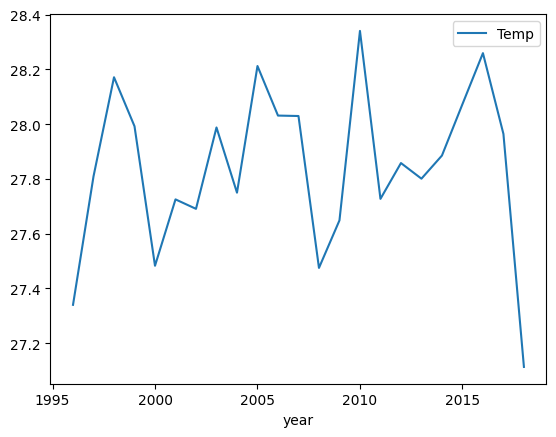

In [72]:
year_means.plot()